In [62]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import datetime as dt

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression



from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [63]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import datetime as dt

import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression



from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


In [64]:
print(pd.__version__)
print(np.__version__)


1.5.3
1.26.0


In [65]:
df = pd.read_csv("resources/store_data.csv")


In [66]:
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unit Price,Price without discount,Unit Cost
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0%,41.9136,130.9800,130.98,20.9568
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0%,219.5820,243.9800,243.98,73.1940
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0%,6.8714,7.3100,7.31,3.4357
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,45%,-383.0310,191.5155,348.21,80.0883
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,20%,2.5164,11.1840,13.98,4.0542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,20%,4.1028,8.4160,10.52,3.4716
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0%,15.6332,45.9800,45.98,7.8166
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,20%,19.3932,129.2880,161.61,42.0186
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0%,13.3200,7.4000,7.40,3.3300


In [67]:
#Pull datatypes for the df
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Row ID                  9994 non-null   int64  
 1   Order ID                9994 non-null   object 
 2   Order Date              9994 non-null   object 
 3   Ship Date               9994 non-null   object 
 4   Ship Mode               9994 non-null   object 
 5   Customer ID             9994 non-null   object 
 6   Customer Name           9994 non-null   object 
 7   Segment                 9994 non-null   object 
 8   Country                 9994 non-null   object 
 9   City                    9994 non-null   object 
 10  State                   9994 non-null   object 
 11  Postal Code             9994 non-null   int64  
 12  Region                  9994 non-null   object 
 13  Product ID              9994 non-null   object 
 14  Category                9994 non-null   

In [68]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Year'] = df['Order Date'].dt.year


In [69]:
# Bar chart that shows sales by category
category_sales = df.groupby('Category')['Sales'].sum()
formatted_category_sales = category_sales.map('$ {:.2f}'.format)

category_sales_df = pd.DataFrame(formatted_category_sales)
category_sales_df


,Sales
Category,
Furniture,$ 741999.80
Office Supplies,$ 719047.03
Technology,$ 836154.03


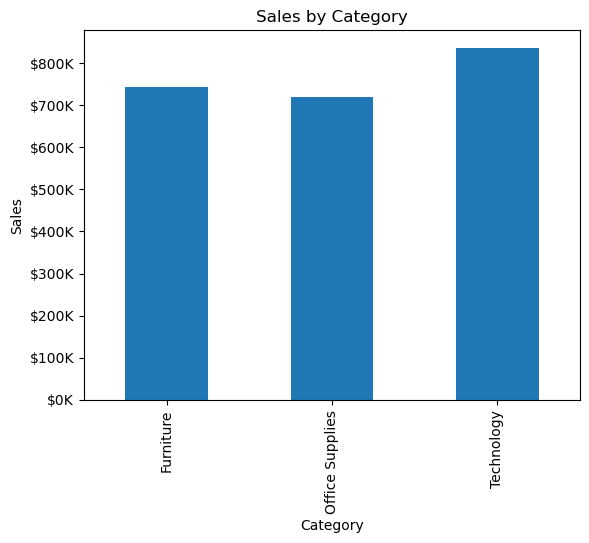

In [70]:
def currency_formatter(x, pos):
    return f"${x/1000:,.0f}K"


y_format = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

category_sales.plot(kind='bar')

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Category')

plt.show()


In [71]:
# Bar chart that shows sales by category
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum()
sub_category_sales = sub_category_sales.sort_values(ascending=False)
formatted_sub_category_sales = sub_category_sales.map('$ {:.2f}'.format)

sub_category_sales_df = pd.DataFrame(formatted_category_sales)
sub_category_sales_df


,Sales
Category,
Furniture,$ 741999.80
Office Supplies,$ 719047.03
Technology,$ 836154.03


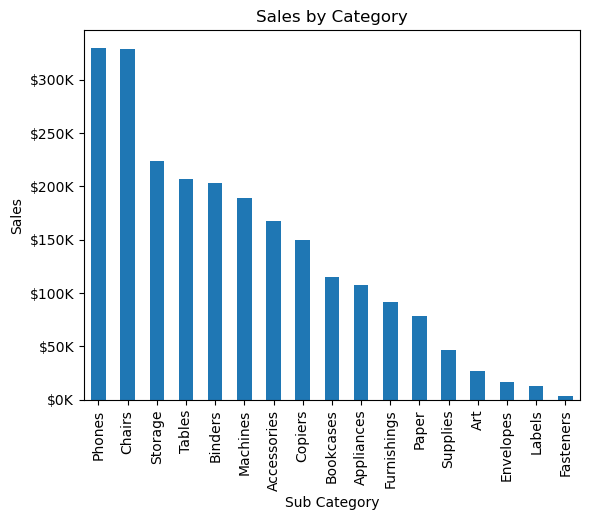

In [72]:
def currency_formatter(x, pos):
    return f"${x/1000:,.0f}K"


y_format = FuncFormatter(currency_formatter)
plt.gca().yaxis.set_major_formatter(y_format)

sub_category_sales.plot(kind='bar')

plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.title('Sales by Category')

plt.show()


In [73]:
# Bar chart that shows sales by category
category_sales_year = df.groupby(['Category', 'Order Year'])['Sales'].sum()

category_sales_year_df = pd.DataFrame(category_sales_year)

category_sales_year_df.reset_index(inplace=True)
category_sales_year_df


,Category,Order Year,Sales
0,Furniture,2014,157192.8531
1,Furniture,2015,170518.2370
2,Furniture,2016,198901.4360
3,Furniture,2017,215387.2692
4,Office Supplies,2014,151776.4120
5,Office Supplies,2015,137233.4630
6,Office Supplies,2016,183939.9820
7,Office Supplies,2017,246097.1750
8,Technology,2014,175278.2330
9,Technology,2015,162780.8090


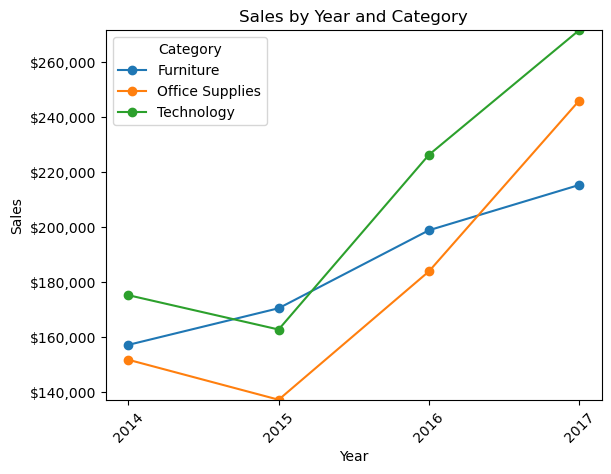

Category,Furniture,Office Supplies,Technology
Order Year,,,
2014,157192.8531,151776.412,175278.233
2015,170518.2370,137233.463,162780.809
2016,198901.4360,183939.982,226364.180
2017,215387.2692,246097.175,271730.811


In [74]:
# Customize the y-axis label formatting
def currency_formatter(x, pos):
    return f"${x:,.0f}"

y_format = FuncFormatter(currency_formatter)

pivot_df = category_sales_year_df.pivot(index='Order Year', columns='Category', values='Sales')

for category in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[category], marker='o', label=category)

# Apply the y-axis label formatting
plt.gca().yaxis.set_major_formatter(y_format)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Year and Category')

# Show the legend
plt.legend(title='Category', loc='upper left')

# Automatically adjust the y-axis scale
plt.autoscale(enable=True, axis='y', tight=True)

x_values = pivot_df.index
plt.xticks(x_values, [int(x) for x in x_values], rotation=45)

# Show the chart
plt.show()
pivot_df


In [75]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corrM = numeric_columns.corr()

# Display the correlation matrix
print(corrM)


                          Row ID  Postal Code     Sales  Quantity    Profit  \
Row ID                  1.000000     0.009671 -0.001359 -0.004016  0.012497   
Postal Code             0.009671     1.000000 -0.023854  0.012761 -0.029961   
Sales                  -0.001359    -0.023854  1.000000  0.200795  0.479064   
Quantity               -0.004016     0.012761  0.200795  1.000000  0.066253   
Profit                  0.012497    -0.029961  0.479064  0.066253  1.000000   
Unit Price             -0.000630    -0.024652  0.889376 -0.003148  0.468312   
Price without discount -0.004820    -0.018394  0.856567  0.000435  0.204591   
Unit Cost              -0.001338    -0.023703  0.805924  0.001725  0.308179   
Order Year              0.015430     0.004299 -0.009679 -0.005810  0.004670   

                        Unit Price  Price without discount  Unit Cost  \
Row ID                   -0.000630               -0.004820  -0.001338   
Postal Code              -0.024652               -0.018394  -0.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if(df.dtypes[i] == 'object'):
        df[i] = le.fit_transform(df[i])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Row ID                  9994 non-null   int64         
 1   Order ID                9994 non-null   int32         
 2   Order Date              9994 non-null   datetime64[ns]
 3   Ship Date               9994 non-null   datetime64[ns]
 4   Ship Mode               9994 non-null   int32         
 5   Customer ID             9994 non-null   int32         
 6   Customer Name           9994 non-null   int32         
 7   Segment                 9994 non-null   int32         
 8   Country                 9994 non-null   int32         
 9   City                    9994 non-null   int32         
 10  State                   9994 non-null   int32         
 11  Postal Code             9994 non-null   int64         
 12  Region                  9994 non-null   int32   

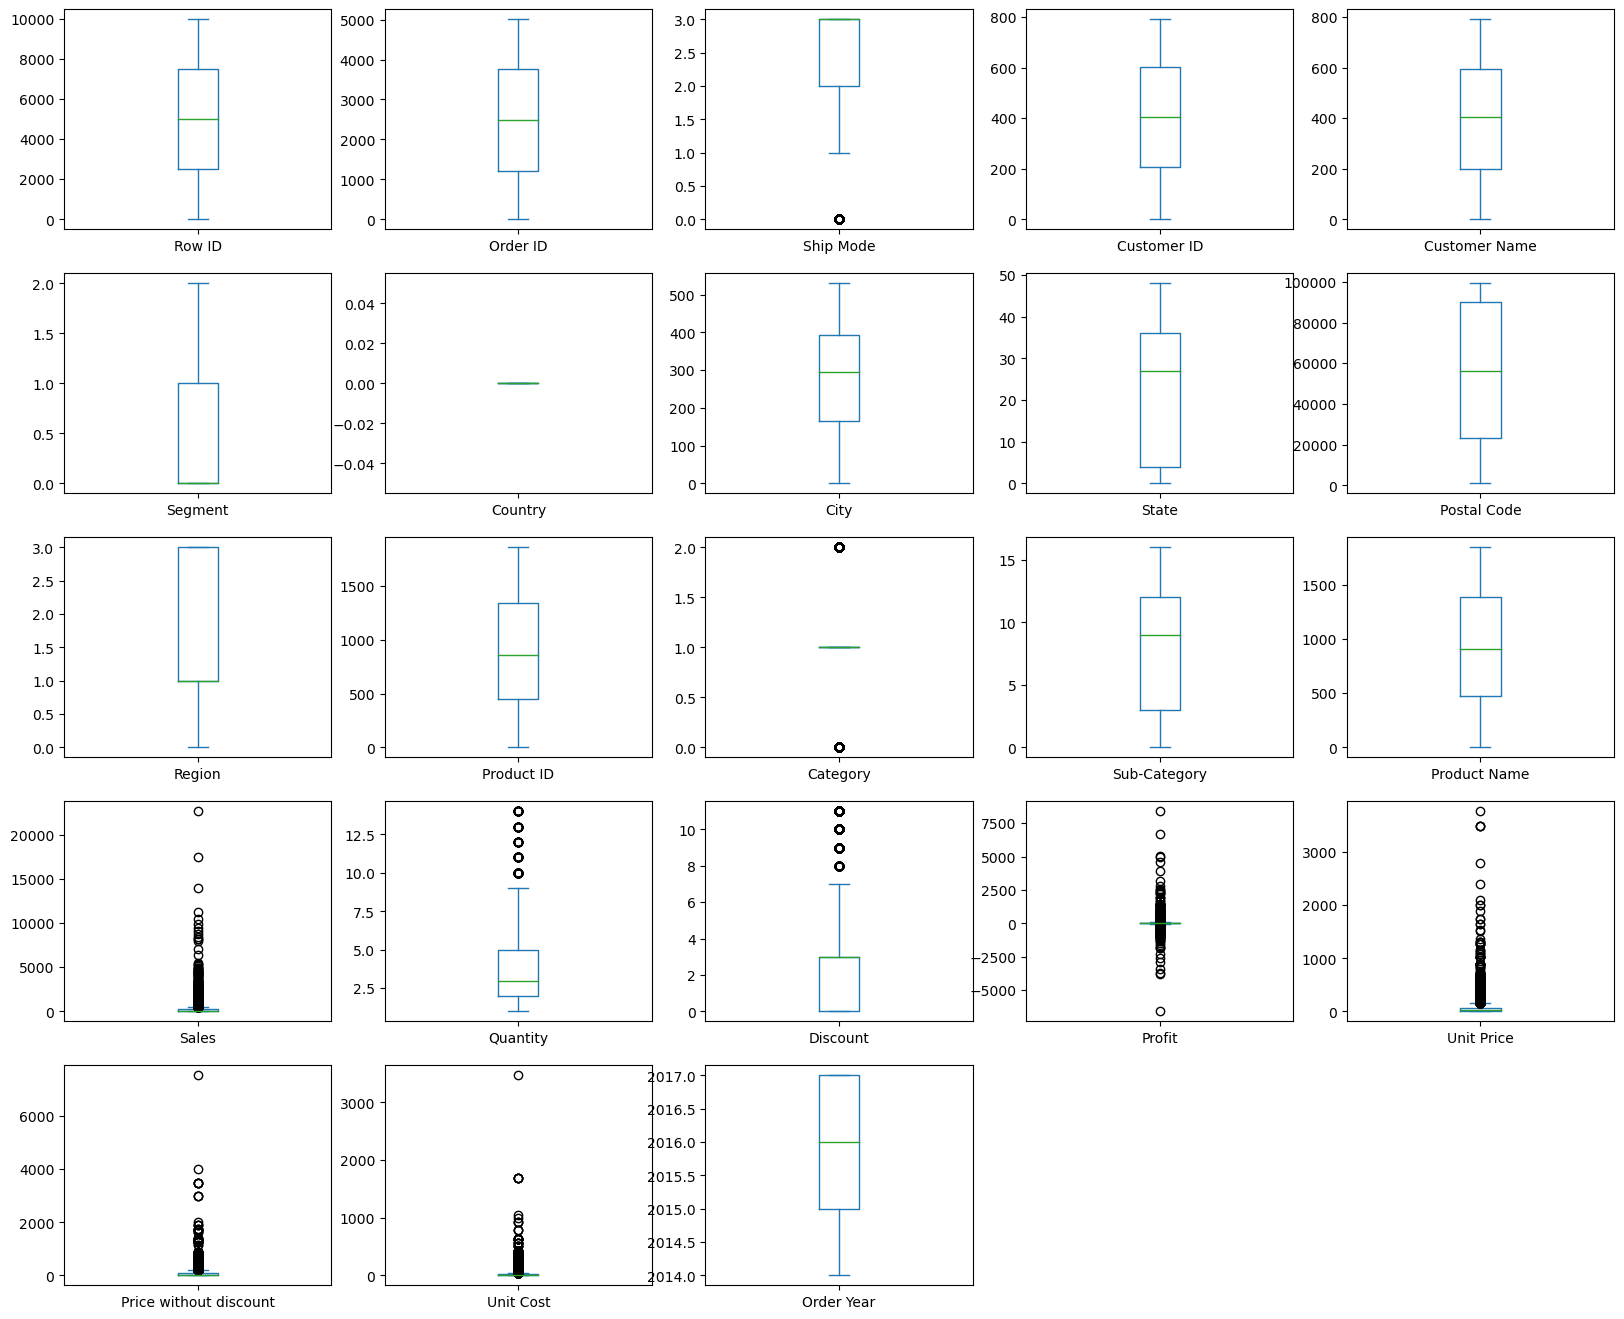

In [77]:
#representing the outliers
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()


In [78]:
#cleaning up columns

df.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code',
           'Region', 'Product ID', 'Product Name', 'Order Date', 'Order Year'], axis=1, inplace=True)
df.columns


Index(['Segment', 'City', 'State', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Unit Price',
       'Price without discount', 'Unit Cost'],
      dtype='object')

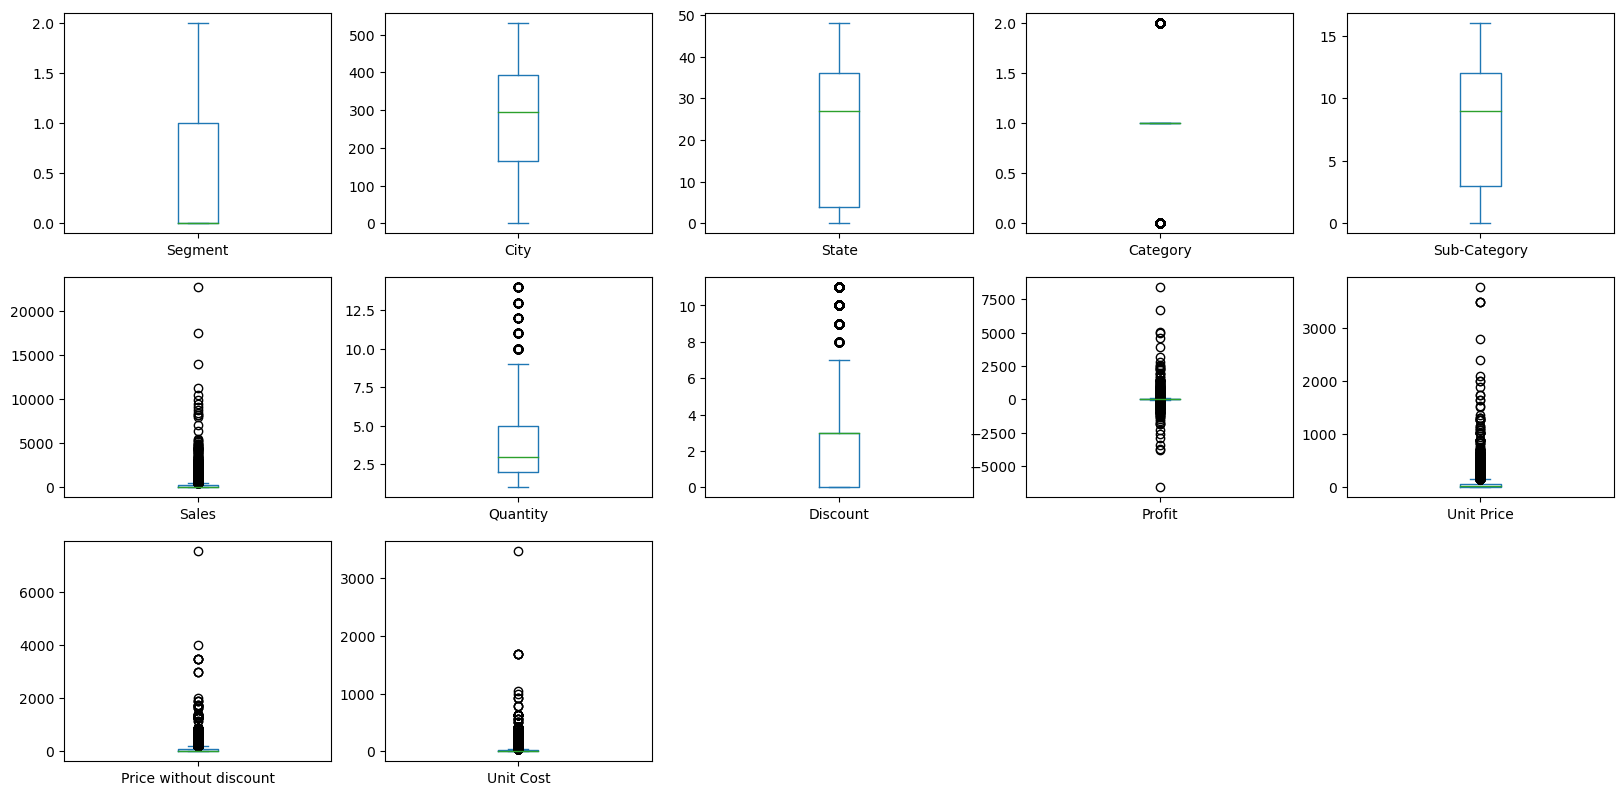

In [79]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()


In [80]:
#deleting some of the outliers
print("Old Shape: ", df.shape[0])
df.drop(index= df[(df['Sales'] > 12000)].index, inplace=True)
df.drop(index= df[(df['Profit'] > 5000) | (df['Profit'] < -3000)].index, inplace=True)
df.drop(index= df[(df['Discount'] >= 7)].index, inplace=True)
df.drop(index= df[(df['Quantity'] > 10)].index, inplace=True)
print("NEW Shape: ", df.shape[0])


Old Shape:  9994
NEW Shape:  8950


In [81]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error


#using standard scaler
sc = StandardScaler()
x = df.drop(['Sales'] , axis = 1).values
y =df['Sales'].values

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


linear regression
0.8901371036961865
0.8938850968696821
Reg_score: 0.8938850968696821
Mean Squared Error: 25726.279474360163
Mean absolute percentage error: 2.8135415500548477
Mean absolute error: 81.58264799059965
rmse: 160.39413790522445


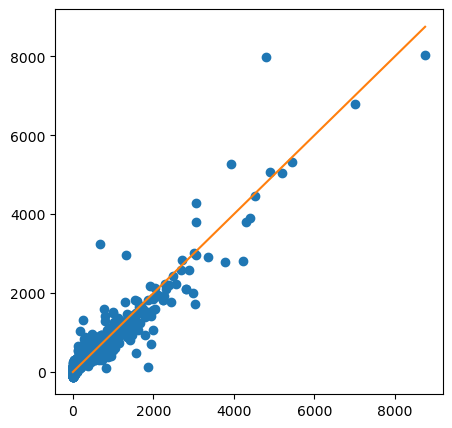

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print("linear regression")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
reg_score = r2_score(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()
